# Assignment 3

Due Mon, Mar  22, 9:30am, commited to your `phys248` repo on the Abacus GitLab server. 

## 1.
The _SIR_ model (W. O. Kermack and A. G. McKendrick, 1927, see [Wikipedia page on this topic for references and additional detail](https://en.wikipedia.org/wiki/Mathematical_modelling_of_infectious_disease)) describes the outbreak and evolution of an infectious desease.

The model describes the evolution of a population with $N$ individuals, each of which belongs at any given time to one of three _compartments_:
* $S(t)$ is used to represent the number of individuals not yet infected with the disease at time t, and which are susceptible to the disease.
* $I(t)$ is the number of individuals that are infected and contagious.
* $R(t)$ represents individuals who have been infected and then removed from the disease, either due to immunization or due to death. Individuals in this category are not able to be infected again or to transmit the infection to others.

The total population $ N = S(t) + I(t) +R(t) $ is constant. In this model there is a general progression of individuals: 
$$\mathcal{S} \rightarrow \mathcal{I}  \rightarrow \mathcal{R}$$

The differential equations are interestingly quite similar to reaction networks in chemistry or nuclear physics, where a member of compartment $\mathcal{S}$ has to interact with a member of compartment $\mathcal{I}$ to create a new member of $\mathcal{I}$. This is equivalent to a reaction. The transition from $\mathcal{I}$ to $\mathcal{R}$ is equivalent to a radioactive decay.

The system of differential equations is:
$$ \frac{dS}{dt} = -\frac{\beta S I}{N} $$
$$ \frac{dI}{dt} = \frac{\beta S I}{N} - \gamma I$$
$$ \frac{dR}{dt} = \gamma I$$


$\gamma$ represents the mean recovery/death rate in units of $\mathrm{d^{-1}}$, and $1/\gamma$ is the mean infective period $P_\mathrm{inf} = 1/\gamma$. The infective period is the asymptomatic incubation period plus the symptomatic time until the individual transitions to compartment $\mathcal{R}$. 

$\beta$ represents the infection rate. If $n_\mathrm{inf}$ is the number of members of $\mathcal{S}$ each member of $\mathcal{I}$ infects, then $\beta = n_\mathrm{inf} / P_\mathrm{inf} = n_\mathrm{inf} \gamma$. 

The final input parameters are the population size $N$ and the initial values $S_0$, $I_0$ and $R_0$. 

### 1.1 
Solve the model equations for $\gamma = 1/10\mathrm{d^{-1}}$ which implies an infective period of $P_\mathrm{inf} = 1/\gamma = 10\mathrm{d}$. Use as initial values $(S_0, I_0, R_0) = (N-I_0, 574,0)$ and $N=1.1\times10^7$. These are the parameters that describe approximately the situation of the Corona virus infection in China, focussing on the city of Wuhan, on January 22 2020:

![Cvirus](../Figs/Cvirus.png)

This data could at the time be viewed and exlored at the WHO web page.

By Feb 4 (13 days later) the number of infected individuals had increased to $24.4\times10^3$ individuals.

The goal is to estimate $n_\mathrm{inf}$. Start with $n_\mathrm{inf} = 2$ implying that each infected person will infect on average 2 uninfected individuals. Make a simulation for the duration of $13\mathrm{d}$ and repeat while adjusting the $n_\mathrm{inf}$ parameter (to within one decimal) until it approximately matches  the Wuhan data, i.e. after 13 days the $\mathcal{I}$ compartment has risen from its initial value to approximately $25\mathrm{k}$. What is the best value of  $n_\mathrm{inf}$?

Save the plot for this part to the file `Fig1.1.png`.

Note: The parameter $n_\mathrm{inf}$ is now widely known as the reproductive number $R_0$, not to be confused with the variable $R$ we are using here for the removed population.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

ninf = 4 was the best value to match the Wuhan data



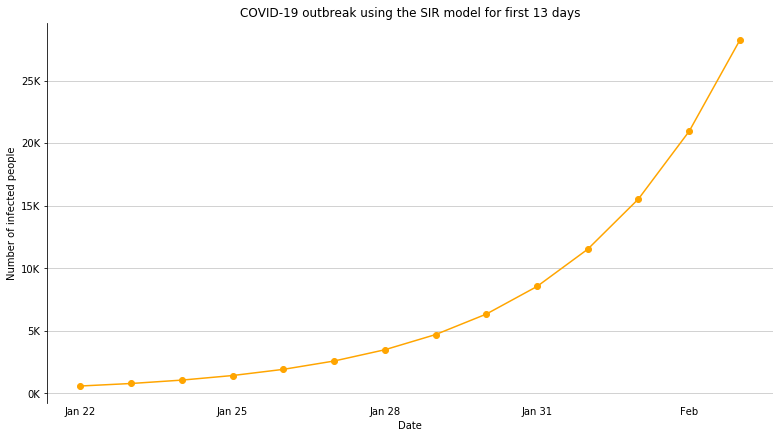

In [3]:
from scipy.integrate import odeint
import matplotlib.ticker as plticker

N = 11000000.0      # Total population
gamma = 1 / 10      # mean recovery/death rate
Pinf = 1 / gamma    # mean infection period
ninf = 4            # num each of S each I infects => start with 2 and update value to match Wuhan data
beta = ninf * gamma # infection rate

#initial values
I0, R0 = 574, 0     
S0 = N - I0     
y0 = S0, I0, R0

def dfdt(y, t, N, gamma, beta):
   
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt =  beta * S * I / N - gamma * I
    dRdt = gamma * I
    
    return dSdt, dIdt, dRdt

# Look at a period of 13 days
time = np.linspace(0,13,14)
sol = odeint(dfdt, y0, time, args=(N, gamma, beta))
S, I, R = sol.T

print(f"ninf = {ninf} was the best value to match the Wuhan data")
print()

# Make a plot resembling Wuhan data plot 
plt.close(1)
fig=plt.figure(1,figsize=(13,7)); ax = fig.subplots()
ax.plot(time, I, 'o-',color='orange')
ylabels = ['{:.0f}'.format(y)+'K' for y in ax.get_yticks()/1000]
xlabels = ['Null','Jan 22', 'Jan 25', 'Jan 28', 'Jan 31', 'Feb']
ax.set_yticklabels(ylabels)
loc = plticker.MultipleLocator(base=3.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.set_xticklabels(xlabels)
ax.grid(True,alpha=0.7,axis='y')
ax.set_xlabel('Date')
ax.set_ylabel('Number of infected people')
ax.set_title('COVID-19 outbreak using the SIR model for first 13 days')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='x',  length=0)
plt.savefig('Fig1.1.png',dpi=fig.dpi)
plt.show()
print()


Reference used to change y ticks: https://stackoverflow.com/questions/53747298/how-to-format-seaborn-matplotlib-axis-tick-labels-from-number-to-thousands-or-mi

### 1.2 
Using these parameters make a simulation for $100d$, and plot the three compartments $S$, $I$ and $R$. We are also interested in the rate of hospital admissions per day. These are 5% of the rate of those who transition from $I$ to $R$, i.e. 5% of $\frac{dR}{dt}$. Add as well a line for the 1% fraction of those in $R$ who die. Finally, add a horizontal line for the capacity of hospital beds available in terms of admission capacity per day. China has on average [4.34 beds per 1000 people](https://en.wikipedia.org/wiki/List_of_OECD_countries_by_hospital_beds). Assume that each patient stays 4 days in hospital, and that 20% of the available hospital beds can be used for Corona virus patients. 

#### 1.2.1
After how many days from the beginning of the simulations on Jan 22nd does the hospital admission per day according to the simulation with the $n_\mathrm{inf}$ parameter from **1.1** exceed the available capacity? How many people would have died at this point? (Find these numbers approximately by interacting with your graph zooming in.) Further, in this scenario, by how much would the daily admission exceed capacity when it peaks, and what is the asymptotic number of people who would have died?

#### 1.2.2
Obviously this is not the scenario that unfolded, because $n_\mathrm{inf}$ was dramatically reduced through physical distancing. Esimate how large $n_\mathrm{inf}$ may at most be so that the hospital capacity is not overwhelmed. 

You can see that this scenario is also not what unfolded, at least not in most cases. Interpret your simulation output and speculate why this is also not what happened, and why in most places $n_\mathrm{inf}$ was further reduced and kept lower. 

In [4]:
%matplotlib ipympl

# Set up problem to model over 100 day period
time100 = np.linspace(0,100,101)
sol100  = odeint(dfdt, y0, time100, args=(N, gamma, beta)) 
S100, I100, R100 = sol100.T

# Number of Hospital admission = 5% of dR/dt
DR = gamma*I100
hospital_admission = 0.05*DR

# Death = 1% of R
death = 0.01*R100
beds = N/4 * 4.34/1000 * 0.2

plt.close(2)
fig = plt.figure(2,figsize=(10,7)); ax = fig.subplots()
ax.set_yscale('log')
ax.plot(time100, S100, label ='S(t)')
ax.plot(time100, I100, label = 'I(T)')
ax.plot(time100, R100, label = 'R(T)')
ax.plot(time100, death, label='Death')
ax.plot(time100, hospital_admission,label='Hospital admission')
ax.plot(time100, [beds]*len(time100),color='black',label='Available beds')

# yticks = ['{:.0f}'.format(y/1000000) for y in ax.get_yticks()]
# ax.set_yticklabels(yticks)

ax.legend(bbox_to_anchor=(0.88,0.7))
ax.grid(True,alpha=0.7)
ax.set_ylim(100,None)
ax.set_xlabel("Days since Jan 22")
ax.set_ylabel("Population")
ax.set_title("SIR model of COVID-19 outbreak in Wuhan for first 100 days")

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [96]:
special_ind = np.where(abs(hospital_admission - beds) < 250)
ind = special_ind[0][0]

print(f"""   From the graph we can see that the number of admited patients 
exceeds the number of available beds after 22 days. At this point 
there will have been {np.round(death[ind]):.0f} deaths according to this model.
In this scenario, there will be a peak of {np.round(max(hospital_admission)):.0f},
which is {np.round(max(hospital_admission)-beds):.0f} more people admited than there are 
available beds.""" )

   From the graph we can see that the number of admited patients 
exceeds the number of available beds after 22 days. At this point 
there will have been 1814 deaths according to this model.
In this scenario, there will be a peak of 22189,
which is 19802 more people admited than there are 
available beds.


In [8]:
ninf_new = 1.7
beta_new = ninf_new * gamma 

# Set up problem to model over 100 day period
time_new = np.linspace(0,100,101)
sol_new  = odeint(dfdt, y0, time100, args=(N, gamma, beta_new)) 
S_new, I_new, R_new = sol_new.T

# Number of Hospital admission = 5% of dR/dt
DR = gamma*I_new
hospital_admission = 0.05*DR

# Death = 1% of R
death = 0.01*R_new
beds = N/4 * 4.34/1000 * 0.2

plt.close(2)
fig = plt.figure(2,figsize=(10,7)); ax = fig.subplots()

ax.plot(time_new, hospital_admission,label='Hospital admission')
ax.plot(time_new, [beds]*len(time100),color='black',label='Available beds')
ax.legend()
ax.grid(True,alpha=0.7)
#ax.set_ylim(100,None)
ax.set_xlabel("Days since Jan 22")
ax.set_ylabel("Population ")
ax.set_title(f"SIR model with ninf={ninf_new} ")

plt.show()
print()

# Not sure what he's looking for with this question but here we go.
print(f"""When ninf = {ninf_new} we see that within the the number of hospitalization never exceeds the number of available beds 
for the first 100 days. ninf in this case is not a whole number, but we can think of it as an average; on average infected people infect {ninf_new} healthy people.

ninf was kept lower in some places more so than other places because people in those places have more common sense, more respect for others and are just more decent.
Further stricter measures were put in place, like manditory curfews in France, or tracking people's movement through their phones like in south Korea which proved effective.
So in those places ninf was significantly reduced. In contrast, in other parts of the world, people are a lot more self intitled and beleive they are above everyone else.
In these places, they refuse to follow guidlines meant to reduce ninf, even going as far as protesting and in some cases claiming their civil liberties and freedom 
are being threatened due to the government wanting to reduce ninf. So ninf ended up being (and still is) way higher than it should be.""")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …


When ninf = 1.7 we see that within the the number of hospitalization never exceeds the number of available beds 
for the first 100 days. ninf in this case is not a whole number, but we can think of it as an average; on average infected people infect 1.7 healthy people.

ninf was kept lower in some places more so than other places because people in those places have more common sense, more respect for others and are just more decent.
Further stricter measures were put in place, like manditory curfews in France, or tracking people's movement through their phones like in south Korea which proved effective.
So in those places ninf was significantly reduced. In contrast, in other parts of the world, people are a lot more self intitled and beleive they are above everyone else.
In these places, they refuse to follow guidlines meant to reduce ninf, even going as far as protesting and in some cases claiming their civil liberties and freedom 
are being threatened due to the government wanting t

Reference to format y ticks : https://stackoverflow.com/questions/12608788/changing-the-tick-frequency-on-x-or-y-axis-in-matplotlib/12608937

## Problem 2

$$
f(x) = \sin(x^{0.9})
$$ and
$$
g(x) = \cos(2x+\sqrt{x})
$$

1. Plot $g(x)$ vs. $f(x)$ for $x \in [0, \dots ,50]$ using 1000 equal intervals.
2. Make a _snake_ scatter plot of the first 40 points (40 is then the _snake length_) of the $x$ array from part 2.1. Make the size and color proportional to $x$ within the plotted range (snake length) so that the _head_ of the snake is on color and large and the tail is small and the other color.   
3. Create a multi-processing script and add it to the assignment commit, that creates 960 frames, each of which shows a snake scatter as in 2.2, but each with a different, subsequent starting point in the $x$ array from its $1^\mathrm{st}$ to $960^\mathrm{th}$ value. The multi-processing script should use 6 threads. Each frame is written to a png image file with the number of the x value in the name. Finally, use the `ffmpeg` program to combine the frames into a movie called `trig_snake.mp4`. Use `-framerate 30` to generate a swift movie experience.

In [9]:
# implement the funcions mentioned in question
def f(x):
    return np.sin(x**0.9)

def g(x):
    arg = 2*x+np.sqrt(x)
    return np.cos(arg)

# initiate things
n = 1000
x = np.linspace(0,50,n+1)
f = f(x)
g = g(x)

# plot things
plt.close(2);fig = plt.figure(2); ax = fig.subplots(nrows=2,ncols=1,sharex=True, sharey=True)
ax[0].grid(True,alpha=0.6)
ax[1].grid(True,alpha=0.6)
ax[0].plot(f,g)
ax[1].scatter(f[:40], g[:40], s=x[:40]*40, c=x[:40], marker='o')
fig.text(0.05,0.5, 'function values', va='center',rotation='vertical')
fig.text(0.5,0.01, 'x values', ha='center')

fig.suptitle("Plot and snake scatterplot of f(x) vs. g(x)")
plt.show()

print("Reference used to make common ylabl: https://stackoverflow.com/questions/16150819/common-xlabel-ylabel-for-matplotlib-subplots")

# If we could install python packages, could install hyperlink then do the following:
# url = https://stackoverflow.com/questions/16150819/common-xlabel-ylabel-for-matplotlib-subplots
# better_url = url.replace(scheme=u'https',port=whatever)
# clickable = better_url.click(u'.')
# print(clickable.to_text())

# This would print out a string with a hyperlink to the reference.
# Reference: https://hyperlink.readthedocs.io/en/latest/

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Reference used to make common ylabl: https://stackoverflow.com/questions/16150819/common-xlabel-ylabel-for-matplotlib-subplots


In [12]:
from multiprocessing import Pool

frames = np.linspace(0,960,961,dtype=int)
def image(inp = (1,0)):
    i, local_index = inp
    plt.figure(i)
    plt.scatter(f[local_index:local_index+40], g[local_index:local_index+40], s=x[:40]*40, c=x[:40], marker='o')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.savefig('trig_snake'+str(i).zfill(4)+".png")
    plt.close(i)
    
p = Pool(6)
p.map(image, enumerate(frames))
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### Bash commands: 

nano movies.sh<br><br>
"ffmpeg  -framerate 10   -y -f image2  -pattern_type glob -i "$1*.png" -preset slow -crf 18  -c:v libx264 -b:v 12000k  -pix_fmt yuv420p  $1.mp4"<br><br>
bash movies.sh trig_snake<br><br>
rm trig_snake*.png

## 3. Random walk
In this problem you will program a random walk and explore its properties.
A two-dimensional random walk is the result of making random steps in both x- and y-directions. 

Tip: Start the program developement for very small parameters of number of steps and walks and check your results every step. Built you program out of small elements, one expression and one line at a time, each of which you check. This will save you time later  when you otherwise have a hard time finding bugs.

### 3.1 

Generate a data set that represents $n=10000$ random steps in the $(x,y)$ - plane. The random walk starts at $(x_0,y_0) = (0,0)$. Each of the following $n$ steps will advance by $\Delta x$ and $\Delta y$, each of which is either $+ 0.5$ or $-0.5$. Make a plot of the random walk by representing the position at each of the $n$ steps with a square marker in which the color represents the step number. 


In [6]:
# 2D random walk

n = 10000                  # number of steps
n_steps = np.linspace(0,10000,n+1)
step_size = [-0.5,0.5]     # step sizes
dim = 2                    # dimension, 2D walk => dim = 2
origin = np.zeros((1,dim)) # origin at (x0,y0) = (0,0)

# the walk
shape = (n, dim)  # shape of randomly chose tuple          
steps = np.random.choice(step_size, shape, p=[0.5,0.5]) #random step, note both step sizes have same probability
walk  = np.concatenate([origin, steps]).cumsum(0) # A walk is just a bunch of steps taken one after another
start = walk[:1]
end = walk[-1:]

# Plot it
%matplotlib ipympl
plt.close(10);plt.figure(10,figsize=(15,9))

plt.scatter(walk[:,0], walk[:,1], marker='s',c=n_steps, cmap='plasma', s=2, alpha=10)
cbar = plt.colorbar()
cbar.set_ticks([0,2000,4000,6000,8000,10000])
cbar.set_ticklabels(['0','2k','4k','6k','8k','10k'])
cbar.set_label('Step Number',labelpad=-25,y=1.08,rotation=0)
plt.plot(start[:,0],start[:,1],color='green',marker='o',markersize=7,label='Start of walk')
plt.plot(end[:,0], end[:,1], color='red',marker='o',markersize=7,label='End of walk')
plt.legend(prop={'size':10})
plt.xlabel("X direction",fontsize=13)
plt.ylabel('Y direction',fontsize=13)
plt.title(f'2D Random walk with n={n} steps',fontsize=15)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### 3.2 

Make $n_\mathrm{walk} = 1000$  walks of $n=10000$.  
* Each time save an array with the distance of each of the $n$ positions from the origin. 
* Plot a histogram  of the maximum and final distance in the same diagram, using the `alpha` option to make sure both histograms can be seen. 
* Plot the distance as a function of step number for every $100^\mathrm{th}$ walk.

In [4]:
# using tuples like in the last part is too messy for this question, use new method

# random.choice(step_sizes, (number of walks, length of each walk), prob_steps)
# axis = 1 => sum up steps in each walk i.e each row
walk_x = np.cumsum(np.random.choice([-0.5,0.5], (1000, 10000), p=[0.5,0.5]), axis=1)
walk_y = np.cumsum(np.random.choice([-0.5,0.5], (1000, 10000), p=[0.5,0.5]), axis=1)
dist = np.sqrt(walk_x**2 + walk_y**2)
max_d = np.amax(dist,axis=1)
last_d = dist[:,-1]

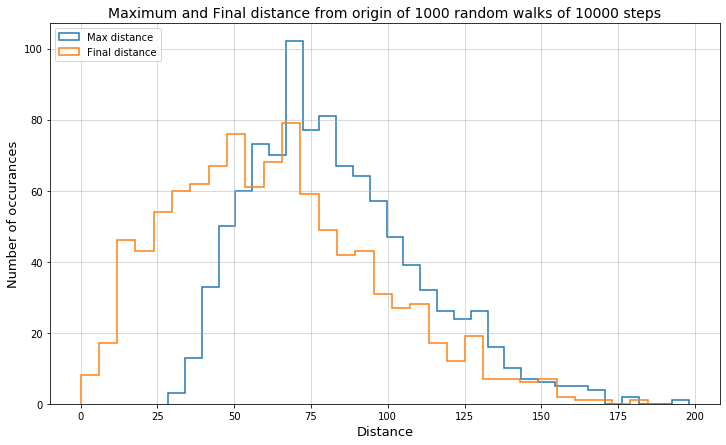

In [5]:
# Histogram of maximum and final distance
# using histtype='step' is vastly superior to messing with the alpha parameter in this case

n_bins = int(np.sqrt(1000))
plt.close(9);plt.figure(9,figsize=(12,7))
plt.hist(max_d, bins=n_bins, histtype='step', lw=1.5, label='Max distance')
plt.hist(last_d, bins=n_bins, histtype='step', lw=1.5, label='Final distance')
plt.legend()
plt.grid(True, alpha=0.6)
plt.xlabel('Distance',fontsize=13)
plt.ylabel('Number of occurances',fontsize=13)
plt.title('Maximum and Final distance from origin of 1000 random walks of 10000 steps',fontsize=14)
plt.show()

In [103]:
plt.close(8);plt.figure(8,figsize=(12,7))
[plt.plot(ith_dist,lw=0.7,alpha=0.8,label=f"{i}00th walk") for i,ith_dist in enumerate(dist[::100])]
plt.plot(dist[-1],lw=0.7,alpha=0.8,label='1000th walk')
plt.xlabel('Step number',fontsize=13)
plt.ylabel('Distance from origin',fontsize=13)
plt.title('Distance from origin as a function of steps for every 100th walk',fontsize=14)
plt.legend()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### 3.3
Explore the maximum distance the random walk gets away from the origin as a function of the number of steps taken. Make $n = 2^p$ steps for $p \in [4, 5, \dots ,13]$, and each time make $n_\mathrm{walk} = 1000$  walks to establish good statistics. For each of the 10 cases (one for each $p$) determine the distance $r_\mathrm{max-hist}$ at which the maximum of the histogram of the maximum distance of the $n_\mathrm{walk}$ walks for this case with $n$ steps is located. Then plot $r_\mathrm{max-hist}$ vs. $log_\mathrm{10} n$.

In [104]:
p = np.linspace(4,13,10,dtype=int)

def walk2d(p):
    '''Takes int and returns an array of length=1000, where each entry is the max distance in a walk'''
    n_steps = 2**p
    walk_x = np.cumsum(np.random.choice([-0.5,0.5], (1000, n_steps), p=[0.5,0.5]), axis=1)
    walk_y = np.cumsum(np.random.choice([-0.5,0.5], (1000, n_steps), p=[0.5,0.5]), axis=1)
    dist = np.sqrt(walk_x**2 + walk_y**2)
    max_d = np.amax(dist,axis=1)
    #last_d = dist[:,-1]
    
    return max_d

# call function for each value of p, store max of max-distance of all 1000 walks into list
uber_max = []
for confused in p:    
    max_of_each_walk = max(walk2d(confused))
    uber_max.append(max_of_each_walk)

# expect uber_max to have len 10; matches p index-wise
assert len(uber_max) == len(p)

In [105]:
# plot in log base 2
# log base 10 doesn't make sence here since we're plotting 2^p here (not 10^p)
# not sure if that's yet another bad typo............

plt.close(7);fig=plt.figure(7,figsize=(12,7)); ax = fig.subplots()
ax.set_xscale('log', basex=2)
ax.plot(2**p,uber_max,'o')
xticks = [f"{i+4}" for i, _ in enumerate(ax.get_yticks())]
ax.set_xticks(2**p)
ax.set_xticklabels(xticks)
ax.set_xlabel('value of p',fontsize=13)
ax.set_ylabel('${r_{max-hist}}$',fontsize=13)
ax.set_title('Maximum distance from origin for ${2^p}$ steps taken')
ax.grid(True,alpha=0.6)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Problem 4

1. Create a python function `func1` that calculates 
$$f(x) = sin(x^3)\frac{x^3}{exp(-x)}$$ Make a plot for  $x\in[-2.5,1]$ using an x array representing 100 intervals.
2. Calculate the derivative $\frac{df}{dx}$ numerically and make a plot of the derivative.
3. Calculate the integral of $f(x)$ for $x\in[-2.5,1]$  using 
    * a library that uses a conventional discrete integration
    * a Monte-Carlo method
4. Solve the ODE $$\frac{dx}{dt} = f(x)$$ for the initial value $x_{01}=-1.465$, and a second time for $x_{02}=-1.463$ for $t\in[0,20]$. Make a plot of $x(t)$ for both initial value and explain briefly why the two trajectories is so different althoug the initial values are almost the same.

In [9]:
# define function and input array
n = 100
x = np.linspace(-2.5,1,n+1)

def func(x):
    return np.sin(x**3) * x**3 * np.exp(x)

# Find gradient => used np.gradient dunno if that's what was asked for or do it manually
deriv_f = np.gradient(func(x),x)

# integrate using a function
from scipy import integrate
f = func(x)
F_lib = integrate.cumtrapz(f,x)

# Monte-Carlo Int
np.random.seed(123)
def MonteCarloInt(func,xrange,N):
    Dx = np.diff(xrange)[0]
    x  = Dx * np.random.rand(N) + xrange[0]
    
    func_avg = func(x).mean()
    I = func_avg * Dx
    
    return I
xrange = np.array((-2.5,1))
N = 10000
F_MC = MonteCarloInt(func,xrange, N)

# Compare Monte-Carlo with Cumtrapz
print(f"""The integral of f(x) in the specified range was found to be {F_MC:.2f} using Monte-Carlo integration, 
and {F_lib[-1]:.2f} using the cumtrapz method from scipy.integrate""")
print()

# Some plots
plt.close(10);fig = plt.figure(10,figsize=(10,5)); ax = fig.subplots(nrows=2,ncols=1)

ax[0].plot(x,func(x),label='f(x)')
ax[0].plot(x,deriv_f,label='df/dx')
ax[1].plot(x,func(x),label='f(x)')
ax[1].plot(x[1:], F_lib, label='integral F(x)')
ax[0].grid(True,alpha=0.6)
ax[1].grid(True,alpha=0.6)
fig.text(0.02,0.5, 'function values', va='center',rotation='vertical')
fig.text(0.5,0.01, 'x values', ha='center')
ax[0].legend()
ax[1].legend()
fig.suptitle("Function f(x) plotted alongside its derivative and integral")
plt.show()


The integral of f(x) in the specified range was found to be 0.50 using Monte-Carlo integration, 
and 0.51 using the cumtrapz method from scipy.integrate



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [10]:
from scipy.integrate import odeint
%matplotlib ipympl
# System

def dsdt(y,t):
    x = y
    dxdt = np.sin(x**3)*x**3*np.exp(x)
    return dxdt

# I.C
x01 = -1.465
x02 = -1.463
t = np.linspace(0,20,101)

# Solve
sol1 = odeint(dsdt,x01,t)
sol2 = odeint(dsdt,x02,t)

# Plot
plt.close(15);plt.figure(15)
plt.plot(t,sol1,label=f"x$_{{{0}}}$ = {x01}")
plt.plot(t,sol2,label=f"x$_{{{0}}}$ = {x02}")
plt.legend()
plt.grid(True,alpha=0.6)
plt.xlabel("Time [s]")
plt.ylabel("x(t)")
plt.title("Trajectory x(t) subject to different initial conditions")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Reference to display latex in a f-string: https://stackoverflow.com/questions/60150031/how-to-display-latex-f-strings-in-matplotlib

Zooming in wher the curves start, we notice that for the inital condition $x_{0}$ = -1.465, the x(t) has a positive gradient and looking at the differential equation, we can see that it will continue being positive. When we change the initial condition slightly to $x_{0}$ = -1.463 we notice that x(t) initially has a negative gradient, and thus will continue having a negative gradient. This is why x(t) looks so different when we slightly vary the initial condition.